# Look-elsewhere-effect

![alternative text](https://imgs.xkcd.com/comics/significant.png)

In [1]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.rc('legend',fontsize=15)
plt.rc('font',size=15)

## Data

- We have a set of measurement of a certain quantity and we expect 20 entries per bin
- 4th bin has a bigger number of entries with respect to the others
- Is it significative to claim that not-only bkg is contained in that bin?

Text(0, 0.5, 'counts')

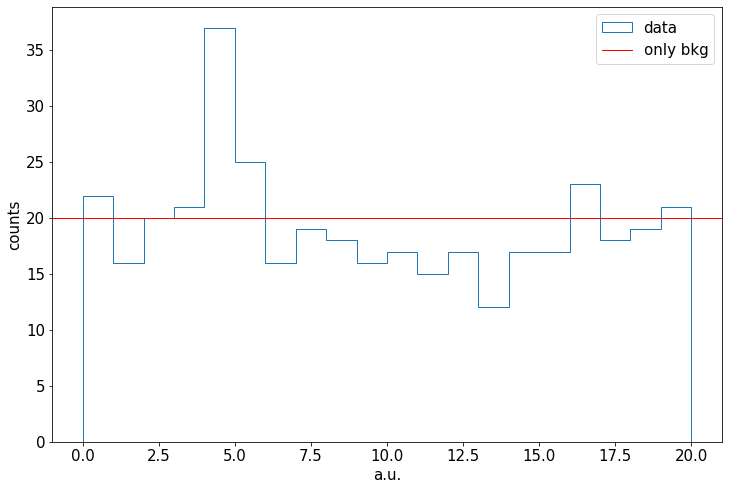

In [2]:
import numpy as np
nbins = 20
mean_bkg = 20
ndata = np.array([22.,16.,20.,21.,37.,25.,16.,19.,18.,16.,17.,15.,17.,12.,17.,17.,23.,18.,19.,21.])
data,bins,_=plt.hist(np.arange(nbins),weights=ndata,label='data',bins=np.arange(nbins+1),histtype='step')
plt.axhline(mean_bkg,label='only bkg',color='red',linewidth=1)
plt.legend(loc='best')
plt.xlabel('a.u.')
plt.ylabel('counts')

## Hypotheses testing

- Each count in bin $i$ distributed as a poissonian $\mathcal{P}(n_i|\nu_i)$, with mean $\nu_i$ and observed count $n_i$
- Log likelihood
\begin{equation}
\log\mathcal{L} = \sum_0^{N-1} \log\mathcal{P}(n_i|\nu_i)
\end{equation}
where N is the total number of bins

- Two possible hypothesis to test
    - $H_0$: null hypotesis - only bkg hypothesis: $\nu_i=20 \;\; \forall i \in \{0\ldots 19\}$
        - $\log\mathcal{L}(H_0) = \sum_{i=0}^{N-1} \log\mathcal{P}(n_i|\nu_i=20)$
    - $H_1 (\mathrm{bin}\;i)$: signal present in bin $i$ - alternative hypothesis
        - The best estimate of $\nu_i$ in the $i$-th bin is $\nu_i=n_i$
        - $\log\mathcal{L}(H_1) = \sum_{j=0,j\neq i}^{N-1} \log\mathcal{P}(n_j|\nu_j=20)+\log\mathcal{P}(n_i|\nu_i=n_i)$

### Local fluctuations

- Test statistic $t$(bin $i$)
\begin{equation}
t(\text{bin }i) = -2\log\frac{\mathcal{L}(H_0)}{\mathcal{L}(H_1 (\mathrm{bin}\;i))} = -2\log\frac{\mathcal{P}\left(n_i|\nu_i=20\right)}{\mathcal{P}\left(n_i|\nu_i=n_i\right)}
\end{equation}
- Calculate the test statistic in each bin
- Estimate the significance of the local fluctuation with the Wilks theorem
- The 4th bin has a local significance over $3\sigma$
- Is this an evidence of the rejection for the $H_0$ hypothesis?
    - No, this is a local significance, not global!
- No physics reason to expect a fluctuation in the 4th bin. We are estimating the significance of a fluctuation in the 4th bin, but we are observing 20 bins

fluctuations ($\sigma$ unit - two sided) =  [ 0.44005444  0.92704172 -0.          0.22178119  3.39466306  1.07572188
  0.92704172  0.22551012  0.45499608  0.92704172  0.68873536  1.17027254
  0.68873536  1.9339558   0.68873536  0.68873536  0.65501859  0.45499608
  0.22551012  0.22178119]


Text(18, 1, '1$\\sigma$')

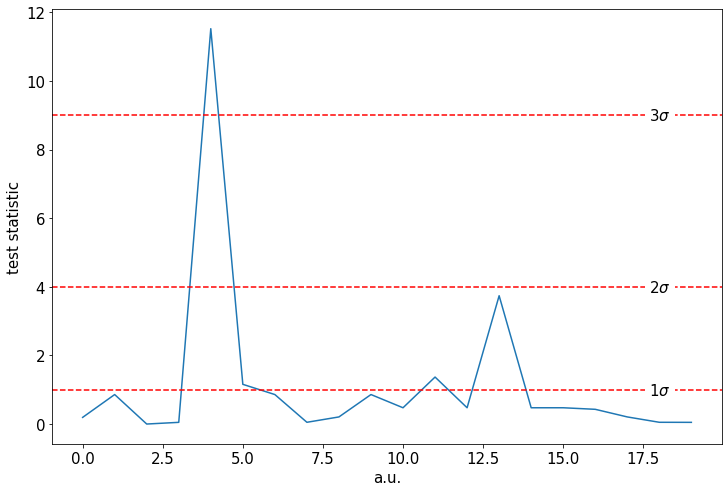

In [3]:
from scipy.stats import poisson
t = -2*np.log(poisson(20).pmf(ndata)/poisson(ndata).pmf(ndata))
print('fluctuations ($\sigma$ unit - two sided) = ',np.sqrt(t))
plt.plot(np.arange(nbins),t)
plt.xlabel('a.u.')
plt.ylabel('test statistic')
plt.axhline(9,linestyle='dashed',color='red')
plt.text(18,9,r'3$\sigma$',ha='center', va='center',backgroundcolor='white')
plt.axhline(4,linestyle='dashed',color='red')
plt.text(18,4,r'2$\sigma$',ha='center', va='center',backgroundcolor='white')
plt.axhline(1,linestyle='dashed',color='red')
plt.text(18,1,r'1$\sigma$',ha='center', va='center',backgroundcolor='white')

### Global fluctuations

- We have to estimate the global significance to properly claim for a only-bkg hypotesis rejection
    - Look elsewhere effect (LEE): the global significance of a fluctuation is always smaller than the local significance
- We estimate the global significance with a frequentist approach
- Generate a large number of pseudo-experiment in the $H_0$ hypothesis
- For each toy:
    - Calculate $-\log\mathcal{L}(H_0)$
    - Calculate $−\log\mathcal{L}(H_1(\mathrm{bin}\; i))$, where the $i$-th bin is the one with the largest fluctuation with respect to the expected background (not only bin 4!)
    - Calculate the test statistic $t$
- The global significance is the p-value of the test statistic under the hypothesis $H_0$
\begin{equation}
\mathrm{p\text{-}value}=\int_{t_{obs}}^{+\infty} f(t|H_0)dt
\end{equation}
and is estimated as
\begin{equation}
\mathrm{p\text{-}value} = \frac{N_{toys}(t > t_{obs})}{N_{toys}}
\end{equation}
where $t_{obs}$ is the test statistic observed in data, $N_{toys}$ is the number of pseudo-experiments

LOCAL SIGNIFICANCE
p-value = 0.000695 (3.20 sigma - one sided)
GLOBAL SIGNIFICANCE
p-value = 0.008371 (2.39 sigma - one sided)


Text(0, 0.5, 'count')

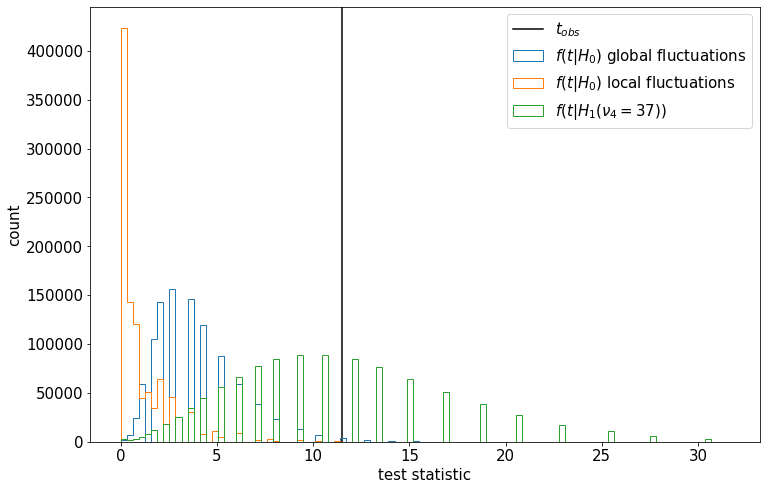

In [4]:
t_obs = -2*np.log(poisson(20).pmf(ndata[4])/poisson(ndata[4]).pmf(ndata[4]))# np.sum(np.log(poisson(20).pmf(ndata)))
plt.axvline(t_obs,color='black',label='$t_{obs}$')

ntoys = 1000000
npseudoexp = poisson(20).rvs(size=[ntoys,nbins])

nu_optimal = np.amax(npseudoexp,axis=1)
t_lee = -2*np.log(poisson(20).pmf(nu_optimal)/poisson(nu_optimal).pmf(nu_optimal))
t_nolee = -2*np.log(poisson(20).pmf(npseudoexp[:,4])/poisson(npseudoexp[:,4]).pmf(npseudoexp[:,4]))
_,bins,_=plt.hist(t_lee,label=r'$f(t|H_0)$ global fluctuations',bins=100,histtype='step')
plt.hist(t_nolee,bins=bins,label=r'$f(t|H_0)$ local fluctuations',histtype='step')
plt.hist(-2*np.log(poisson(ndata[4]).pmf(npseudoexp[:,4])/poisson(npseudoexp[:,4]).pmf(npseudoexp[:,4])),bins=bins,label=r'$f(t|H_1(\nu_4=%d))$'%ndata[4],histtype='step')
plt.legend(loc='best')

from scipy.stats import chi2
print('LOCAL SIGNIFICANCE')
pvalue = len(t_nolee[t_nolee>=t_obs])/len(t_nolee)
nsigma = np.sqrt(chi2(1).ppf(1-pvalue*2))
print('p-value = %f (%.2f sigma - one sided)'%(pvalue,nsigma))
print('GLOBAL SIGNIFICANCE')
pvalue = len(t_lee[t_lee>=t_obs])/len(t_lee)
nsigma = np.sqrt(chi2(1).ppf(1-pvalue*2))
print('p-value = %f (%.2f sigma - one sided)'%(pvalue,nsigma))
plt.xlabel('test statistic')
plt.ylabel('count')